# Describe the elevation of the star during the night

In [11]:
import urllib
import IPython.display
import numpy as np
import astropy

In [12]:
%matplotlib inline
from matplotlib import pyplot as plt
import matplotlib
matplotlib.rc_file("../templates/matplotlibrc")

In [13]:
from astropy import units as u
from astropy.coordinates import SkyCoord
from astropy.coordinates import Angle
from astropy.table import Table
from astropy.coordinates import Angle
from astropy.time import Time, TimeDelta,TimezoneInfo

In [14]:
from datetime import datetime
from pytz import timezone
import pytz
import pandas as pd

In [15]:
from astropy.visualization import astropy_mpl_style
plt.style.use(astropy_mpl_style)

In [16]:
from astropy.coordinates import SkyCoord, EarthLocation, AltAz

## Read the data from the fits file table


This file is a kind of logbook written in a fits format.
It includes the file number, the UTC time and the airmass for all the HD158485_grat_1-25
during the night 2016-05-09-10

In [17]:
tablefile_HD163466_PSF_with_AM='HD163466_y3_1-10_TablePSF_night20160509_withAM.fits'

In [18]:
t = Table.read(tablefile_HD163466_PSF_with_AM)

In [19]:
t.show_in_notebook()

num,file,time,exposure,nbstars,prfx,pfry,sig_prfx,sig_prfy,sigmax,sigmay,azimuth,altitude,airmass
,,,,,,,,,,,deg,deg,
1,AssScImHD163466_y3_1.fits,2016-05-10T08:31:46.221,1.0,7,3.14462939981,3.41466663301,0.0624903435569,0.0399877500438,2.96853015342,3.22344530156,23.5806137675,60.644152987,1.14732601019
2,AssScImHD163466_y3_2.fits,2016-05-10T08:33:17.773,5.0,23,3.23590764548,3.67168661807,0.210812621801,0.313203469327,3.05469681733,3.46607216746,23.2897434465,60.7684891938,1.1459300185
3,AssScImHD163466_y3_3.fits,2016-05-10T08:33:27.174,5.0,30,3.28439425917,3.44808452428,0.153086049741,0.109240066938,3.10046818065,3.25499179092,23.2596645573,60.7811739444,1.14578809387
4,AssScImHD163466_y3_4.fits,2016-05-10T08:33:36.166,5.0,29,3.07852576115,3.39865028239,0.0743265241544,0.182716405574,2.90612831853,3.20832586658,23.230857516,60.7932923357,1.14565259128
5,AssScImHD163466_y3_5.fits,2016-05-10T08:38:53.776,3.0,9,5.01067679435,5.12760526598,0.431963018433,0.931127413941,4.73007889387,4.84045937108,22.1902935409,61.212072237,1.14102086053
6,AssScImHD163466_y3_6.fits,2016-05-10T08:39:35.943,3.0,4,3.66881377389,3.71438578859,0.125757386795,0.0576096104765,3.46336020256,3.50638018443,22.0487742545,61.2662900264,1.14042839219
7,AssScImHD163466_y3_7.fits,2016-05-10T08:40:17.637,3.0,15,2.62049631174,2.75934903687,0.053654463766,0.0477390482732,2.47374851828,2.60482549081,21.9080666791,61.3195746269,1.13984771447
8,AssScImHD163466_y3_8.fits,2016-05-10T08:41:40.854,3.0,12,3.02620244552,2.97225160347,0.0890701171525,0.163930894688,2.85673510857,2.80580551367,21.6249245351,61.4249506859,1.13870399801
9,AssScImHD163466_y3_9.fits,2016-05-10T08:41:47.875,3.0,15,2.85053312944,2.90077455,0.076245483463,0.038651577062,2.69090327419,2.7383311752,21.6008955793,61.4337814346,1.13860843107


In [20]:
all_airmass=t['airmass']
all_num=t['num']
all_times=Time(t['time'])

## Define Coordinates Systems

In [21]:
hd_163466_starloc=astropy.coordinates.SkyCoord.from_name('HD163466')

In [22]:
from astropy.coordinates import Longitude, Latitude
NOFS_Longitude=Longitude(u'-111°44′25″') 
NOFS_Latitude=Latitude(u'35°11′03″')
NOFS_Height=2.273*u.m 

In [23]:
#definition of the location to astropy
NOFS_location = astropy.coordinates.EarthLocation(lat=NOFS_Latitude, lon=NOFS_Longitude, height=NOFS_Height)

In [24]:
from astropy.coordinates import get_sun
utcoffset=utcoffset = -7*u.hour  # Mountain  Daylight Time
midnight = Time('2016-5-10 00:00:00') - utcoffset # midnight i UTC

delta_midnight_object_day=all_times-midnight

delta_midnight = np.linspace(-12, 12, 1000)*u.hour

times_May09_to_10 = midnight + delta_midnight
frame_May09_to_10 = AltAz(obstime=times_May09_to_10, location=NOFS_location)

sunaltazs_May09_to_10 = get_sun(times_May09_to_10).transform_to(frame_May09_to_10)

If you need enough precision such that this matters (~<10 arcsec), you can
use the latest IERS predictions by running:

    >>> from astropy.utils import iers
    >>> iers.IERS.iers_table = iers.IERS_A.open(iers.IERS_A_URL)

 [astropy.coordinates.builtin_frames.utils]
If you need enough precision such that this matters (~<10 arcsec), you can
use the latest IERS predictions by running:

    >>> from astropy.utils import iers
    >>> iers.IERS.iers_table = iers.IERS_A.open(iers.IERS_A_URL)

 [astropy.coordinates.builtin_frames.utils]


In [25]:
delta_midnight_object_hour=delta_midnight_object_day.to('hour')
delta_midnight_object_hour

<Quantity [ 1.52950583, 1.55493694, 1.55754833, 1.56004611, 1.64827111,
            1.65998417, 1.67156583, 1.69468167, 1.69663194, 1.69856167] h>

In [26]:
hd_163466_altazs_May09_to_10 = hd_163466_starloc.transform_to(frame_May09_to_10 )

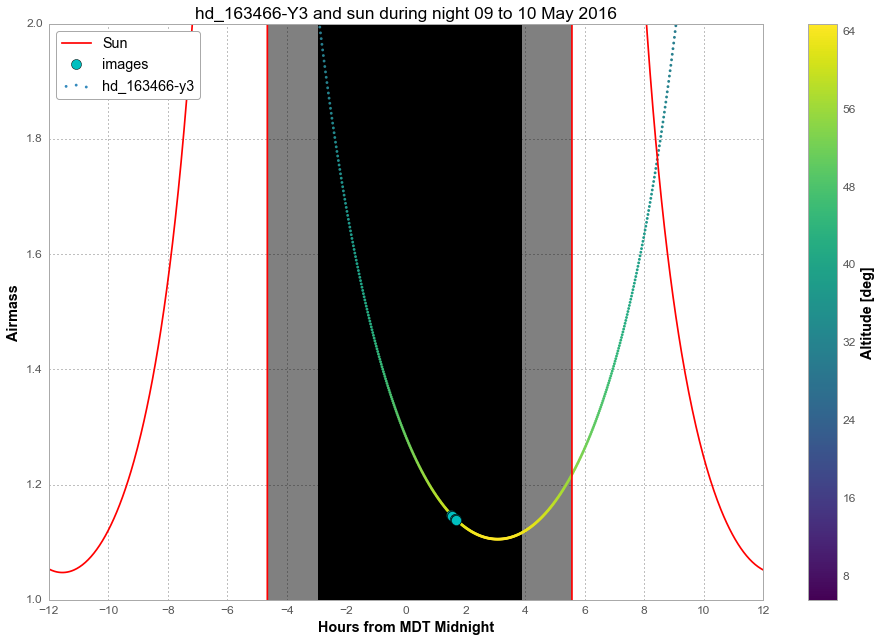

In [27]:
plt.figure(figsize=(16.,10.))
plt.plot(delta_midnight, sunaltazs_May09_to_10.secz, color='r', label='Sun')
plt.plot(delta_midnight_object_hour,all_airmass,marker='o',markersize='10',color='c',linestyle='None',label='images')
plt.scatter(delta_midnight, hd_163466_altazs_May09_to_10.secz,
            c=hd_163466_altazs_May09_to_10.alt, label='hd_163466-y3', lw=0, s=8,
            cmap='viridis')

# plot astronomical twillight
plt.fill_between(delta_midnight.to('hr').value, 0, 2.,
                 sunaltazs_May09_to_10.alt < -0*u.deg, color='0.5', zorder=0)
#plot astronomical night
plt.fill_between(delta_midnight.to('hr').value, 0, 2.,
                 sunaltazs_May09_to_10.alt < -18*u.deg, color='k', zorder=0)
plt.colorbar().set_label('Altitude [deg]')
plt.legend(loc='upper left')
plt.xlim(-12, 12)
plt.xticks(np.arange(13)*2 -12)
plt.ylim(1., 2.)
plt.title('hd_163466-Y3 and sun during night 09 to 10 May 2016')
plt.xlabel('Hours from MDT Midnight')
plt.ylabel('Airmass')
plt.savefig('hd_163466-Y3_airmass_night20160509.pdf')
plt.show()